# Import relevant libraries

In [1]:
# Импортируем необходимые стартовые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Import dataset

In [2]:
# импортируем наш датасет и исследуем его
dataset = pd.read_csv("titanic.csv")

In [3]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Preprocessing

In [4]:
dataset.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Daniel, Mr. Robert Williams",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
# В нашем датасете пустые значения есть в переменной Age, Cabin, Embarked
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# уберем из нашей модели такие переменные: PassengerId, Name, Ticket. Так как в этих перменных либо все, либо почти все значения уникальные, 
# и никакого логического смысла в плане влияния не несут на выживание человека.
data_preprocessed1 = dataset.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)

<AxesSubplot:>

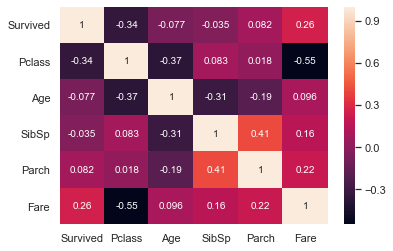

In [7]:
# Построим матрицу корреляций
sns.heatmap(data_preprocessed1.corr(), annot=True)

In [8]:
# Найболее коррелируют с выживаемостью пассажира такие переменные - Pclass и Fare, что безусловно логично (сначала спасали пассажиров, которые богаче)
# Также отметим высокую корреляцию между собой этих перменных (Pclass и Fare). Чем выше класс пассажира. тем больше его транспортные расходы на корабле
# Остальные переменные (Age, SibSp, Parch) исходя из матрицы корреляций оказывают намного меньшее влияние
# Также видно связь переменной Возраст с переменной Класс (чем старше человек, тем больше вероятность что он будет богаче, но этот вывод не факт что верен, это больше как рассуждение)
# Также видим связь переменной Возраст и количеством братьев, сестер, супругов (что весьма логично, и в дополнительных обьяснениях думаю не нуждается)
# Аналогично как последний пункт, видим зависимость между количеством братьев, сестер, супругов и количеством родителей, детей

In [9]:
data_preprocessed1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [10]:
# В категориальной переменной Sex только два уникальных значения, поэтому можем траснформировать эти значения в 0 и 1, чтобы машина могла работать с этими данными
data_preprocessed1['Sex'] = data_preprocessed1['Sex'].map({'male': 1, 'female': 0})
data_preprocessed1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,NaN,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,NaN,S
887,1,1,0,19.0,0,0,30.0000,B42,S
888,0,3,0,NaN,1,2,23.4500,NaN,S
889,1,1,1,26.0,0,0,30.0000,C148,C


In [11]:
# Заполним пустые значения в переменной Age на средние
data_preprocessed2 = data_preprocessed1.fillna(value = {"Age": data_preprocessed1["Age"].mean()})

<AxesSubplot:xlabel='Age'>

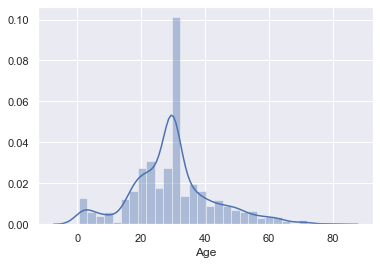

In [12]:
# Приблизительно может увидеть что то похожее на нормальное распределение переменной Age
sns.distplot(data_preprocessed2['Age'])

<AxesSubplot:xlabel='Fare'>

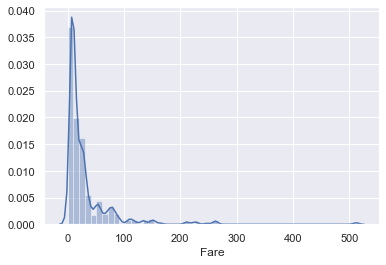

In [13]:
# Посмотрим на распределение переменной Fare
sns.distplot(data_preprocessed2['Fare'])

In [14]:
# Используя метод квантиля избавимся от вылетов в переменной Fare, это поможет нам распределение переменной подогнать ближе к нормальному
# Используем 3% в качестве ориентира для вылетов (первоначально, когда использовал 1% и 2%, это не сильно повлияло на распределение)
q = data_preprocessed2['Fare'].quantile(0.97)
data_preprocessed3 = data_preprocessed2[data_preprocessed2['Fare']<q]
data_preprocessed3.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,180,860
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B96 B98,S
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,627
mean,0.373550,2.352668,0.657773,29.674705,0.518561,0.357309,25.187306,NaN,NaN
std,0.484027,0.814210,0.474731,12.963285,1.105998,0.787496,26.372088,NaN,NaN
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,NaN,NaN
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,13.500000,NaN,NaN
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,29.125000,NaN,NaN


<AxesSubplot:xlabel='Fare'>

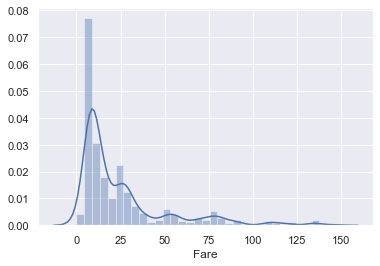

In [15]:
# У нас было 891 строчки, стало 862 - мы избавились от 9 строчек, что составляет около 3,2% всех данных.
# Распределение переменной Fare стало ближе к нормальному
sns.distplot(data_preprocessed3['Fare'])

In [16]:
# Теперь давайте поразмышляем над перменной Номер Каюты
# Всего на корабле было 8 палуб, верхняя — для шлюпок, остальные 7 находились под шлюпочной палубой и имели буквенные обозначения: A, B, C, D, E, F, G.
# Думаю будет логичным создать новую перменную - Палуба на основе перменной Номер Каюты (это уменьшит во много раз количество созданных перменных, если использовать
# потом для трансформации категориальных значений метод One Hot Encoding)
# Также логично, что возможно чем ниже палуба, тем меньше шансов на выживание для пассажира, ну или чем дальше от пробоины от айсберга
pd.unique(data_preprocessed3['Cabin'])

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'B78', 'D33',
       'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31', 'A5', 'D10 D12',
       'D26', 'C110', 'E101', 'F E69', 'D47', 'B86', 'F2', 'C2', 'E33',
       'B19', 'A7', 'C49', 'F4', 'A32', 'B4', 'B80', 'A31', 'D36', 'D15',
       'C93', 'C78', 'D35', 'C87', 'B77', 'E67', 'B94', 'C99', 'C118',
       'D7', 'A19', 'B49', 'D', 'C106', 'C65', 'E36', 'C54', 'E34', 'C32',
       'B18', 'C124', 'E40', 'T', 'C128', 'D37', 'B35', 'E50', 'B96 B98',
       'E10', 'E44', 'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12',
       'E63', 'A14', 'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73',
       'B38', 'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10',
       'E68', 'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26',
       'D48', 'E58', 'C126', 'B71', 'D49', 'B20', 'F G63', 'E24', 'C90',
       'E8', 'D45', 'C46', 'D30', 'E121', 'D11', 'E77', 'F38', 'D6',
       'B82 B84', 'D17', 'A36', 'B102', 'B69', 'E49', 'C47',

In [17]:
# Чтобы создать перменную палуба, извлечем только первую букву из переменной номер каюты
data_preprocessed4 = data_preprocessed3.copy()
data_preprocessed4['Deck'] = data_preprocessed4['Cabin'].str[0]
data_preprocessed4

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck
0,0,3,1,22.000000,1,0,7.2500,NaN,S,NaN
1,1,1,0,38.000000,1,0,71.2833,C85,C,C
2,1,3,0,26.000000,0,0,7.9250,NaN,S,NaN
3,1,1,0,35.000000,1,0,53.1000,C123,S,C
4,0,3,1,35.000000,0,0,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,NaN,S,NaN
887,1,1,0,19.000000,0,0,30.0000,B42,S,B
888,0,3,0,29.699118,1,2,23.4500,NaN,S,NaN
889,1,1,1,26.000000,0,0,30.0000,C148,C,C


In [18]:
pd.unique(data_preprocessed4['Deck'])

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [19]:
# У нас есть много пустых значений, как вариант можем заменить их на значение No, это будет у нас как отдельное значение (отсутствие данных по каюте)
# Возможно эта манипуляция поможет нам раскрыть понимание наших данных с иной стороны
data_preprocessed4 = data_preprocessed4.fillna(value = {"Deck" : "No"})
data_preprocessed5 = data_preprocessed4.drop(['Cabin'], axis = 1)

In [20]:
data_preprocessed5

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,1,22.000000,1,0,7.2500,S,No
1,1,1,0,38.000000,1,0,71.2833,C,C
2,1,3,0,26.000000,0,0,7.9250,S,No
3,1,1,0,35.000000,1,0,53.1000,S,C
4,0,3,1,35.000000,0,0,8.0500,S,No
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S,No
887,1,1,0,19.000000,0,0,30.0000,S,B
888,0,3,0,29.699118,1,2,23.4500,S,No
889,1,1,1,26.000000,0,0,30.0000,C,C


In [21]:
data_preprocessed5.describe(include="all")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
count,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,860,862
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,9
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,No
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,627,682
mean,0.373550,2.352668,0.657773,29.674705,0.518561,0.357309,25.187306,NaN,NaN
std,0.484027,0.814210,0.474731,12.963285,1.105998,0.787496,26.372088,NaN,NaN
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,NaN,NaN
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,13.500000,NaN,NaN
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,29.125000,NaN,NaN


In [22]:
pd.unique(data_preprocessed5['Deck'])

array(['No', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [23]:
# Еще раз проверим наши данные на пустые значения
data_preprocessed5.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Deck        0
dtype: int64

In [24]:
# У нас остались только 2 строчки с пустыми значениями, Уберем их из нашей модели
data_preprocessed5.dropna(subset = ["Embarked"], inplace=True)
data_preprocessed5.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Deck        0
dtype: int64

In [25]:
data_preprocessed5.describe(include="all")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
count,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860,860
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,9
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,No
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,627,682
mean,0.372093,2.355814,0.659302,29.627437,0.519767,0.358140,25.059834,NaN,NaN
std,0.483644,0.812533,0.474220,12.928211,1.107002,0.788223,26.269657,NaN,NaN
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,NaN,NaN
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,13.500000,NaN,NaN
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,29.125000,NaN,NaN


In [26]:
# Трансформируем наши категориальные переменные при помощи метода One Hot Encoding. Также не забываем уберать первое наименование, чтобы избежать мультиколлинераности
data_with_dummies = pd.get_dummies(data_preprocessed5, drop_first=True)
data_with_dummies

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_No,Deck_T
0,0,3,1,22.000000,1,0,7.2500,0,1,0,0,0,0,0,0,1,0
1,1,1,0,38.000000,1,0,71.2833,0,0,0,1,0,0,0,0,0,0
2,1,3,0,26.000000,0,0,7.9250,0,1,0,0,0,0,0,0,1,0
3,1,1,0,35.000000,1,0,53.1000,0,1,0,1,0,0,0,0,0,0
4,0,3,1,35.000000,0,0,8.0500,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,1,0,0,0,0,0,0,1,0
887,1,1,0,19.000000,0,0,30.0000,0,1,1,0,0,0,0,0,0,0
888,0,3,0,29.699118,1,2,23.4500,0,1,0,0,0,0,0,0,1,0
889,1,1,1,26.000000,0,0,30.0000,0,0,0,1,0,0,0,0,0,0


In [27]:
data_with_dummies.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_No', 'Deck_T'], dtype=object)

In [28]:
# Изменим порядок наших переменных для удобства в будущем (чтобы сначала были числовые факторы, а потом категориальные)
cols = ['Survived', 'Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 
       'Embarked_Q', 'Embarked_S', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
       'Deck_No', 'Deck_T']

In [29]:
data_with_dummies_final = data_with_dummies[cols]
data_with_dummies_final.head()

,Survived,Age,Fare,Pclass,Sex,SibSp,Parch,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_No,Deck_T
0,0,22.0,7.2500,3,1,1,0,0,1,0,0,0,0,0,0,1,0
1,1,38.0,71.2833,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,1,26.0,7.9250,3,0,0,0,0,1,0,0,0,0,0,0,1,0
3,1,35.0,53.1000,1,0,1,0,0,1,0,1,0,0,0,0,0,0
4,0,35.0,8.0500,3,1,0,0,0,1,0,0,0,0,0,0,1,0


# Logistic Regression

In [30]:
# Создаем переменные нашей матрицы факторов и зависимой переменной
X = data_with_dummies_final.drop(['Survived'],axis=1)
y = data_with_dummies_final['Survived']

In [31]:
# Разбиваем наш датасет на тренировочный и тестовый
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [32]:
X_train

,Age,Fare,Pclass,Sex,SibSp,Parch,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_No,Deck_T
450,36.000000,27.7500,2,1,1,2,0,1,0,0,0,0,0,0,1,0
208,16.000000,7.7500,3,0,0,0,1,0,0,0,0,0,0,0,1,0
611,29.699118,7.0500,3,1,0,0,0,1,0,0,0,0,0,0,1,0
603,44.000000,8.0500,3,1,0,0,0,1,0,0,0,0,0,0,1,0
871,47.000000,52.5542,1,0,1,1,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,26.000000,14.4542,3,1,1,0,0,0,0,0,0,0,0,0,1,0
109,29.699118,24.1500,3,0,1,0,1,0,0,0,0,0,0,0,1,0
276,45.000000,7.7500,3,0,0,0,0,1,0,0,0,0,0,0,1,0
451,29.699118,19.9667,3,1,1,0,0,1,0,0,0,0,0,0,1,0


In [33]:
y_train

450    0
208    1
611    0
603    0
871    1
      ..
73     0
109    1
276    0
451    0
105    0
Name: Survived, Length: 645, dtype: int64

In [34]:
# Строим модель логистической регрессии
# Поиграем с параметрами нашей логистической регрессии, чтобы найти найлучший вариант
# penalty "l1" и "elasticnet"  для нашей модели использовать не можем, так как по умолчанию алгоритм для использования в задаче оптимизации - это lbfgs, а он поддерживает только форму l2
# при замене на "none" наша точность даже немного повысилась на 0,3%
# параметр fit_intercept (наше смещение функции) лучше оставлять по умолчанию True (при замене на False точность падает на 1%)
# при замене class_weight с None на balanced наша точность упала на 0,2%, если заменить на dict, то изменений нет
# При замене алгоритма для использования в задаче оптимизации на newton-cg точность не изменилась
# При использовании алгоритма liblinear нам необходимо изменить параметр penalty и class_weight на соотвествующие что выбивает в ошибке. Однако точность у нас падает больше чем на 2%.
# При использовании алгоритмов sag и saga точность приблизительно падает на 1,5%
# max_iter - лучший варианты от 98 до 102, оставим значение по умолчанию (100)
# остальные параметры не вносят значимых корректировок в наш финальный результат

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty = 'none', fit_intercept = True, class_weight = 'None', solver = 'lbfgs', max_iter = 100, random_state = 42)
classifier.fit(X_train, y_train)

C:\Users\93ttt\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(class_weight='None', penalty='none', random_state=42)

In [35]:
classifier.score(X_train, y_train)

0.8217054263565892

In [36]:
# Точность нашей модели составила около 82%

In [37]:
# Посмотрим на коэффициенты наших факторов
classifier.coef_

array([[-0.04315473,  0.00454023, -0.81926858, -2.64237243, -0.43055877,
        -0.02551912,  0.135907  , -0.5322888 ,  0.2550707 , -0.09432114,
         1.31251373,  2.12471839,  1.00131561, -0.2760403 , -0.19519938,
         0.        ]])

In [38]:
classifier.intercept_

array([4.64363289])

In [39]:
# Построим для более понятного вида таблицу с коэффициентами, чтобы изучить, какие факторы более значимы, какие менее
pd.DataFrame(classifier.coef_.reshape(-1,1), X.columns, columns = ['Coefficients']).sort_values('Coefficients', ascending=False)

,Coefficients
Deck_E,2.124718
Deck_D,1.312514
Deck_F,1.001316
Deck_B,0.255071
Embarked_Q,0.135907
Fare,0.004540
Deck_T,0.000000
Parch,-0.025519
Age,-0.043155
Deck_C,-0.094321


In [40]:
# Как видно из таблицы, найболее значимым фактором стала переменная Пол (логично, так как сначала на титанике спасали женщин и детей)
# Переменная палуба оказывает значимое влияние (в особенности это касается палубы E)
# Также наблюдаем влияние таких перменных, как Класс, остальные переменные имеют намного меньшее влияние

In [41]:
y_pred = classifier.predict(X_test.to_numpy())
y_test = y_test.to_numpy()
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]

In [42]:
classifier.score(X_test, y_test)

0.7953488372093023

In [43]:
# Используем Confusion Matrix как еще одну качественную характеристику нашей модели
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[107  16]
 [ 28  64]]


0.7953488372093023

In [44]:
# Как видим из Confusion Matrix, у нас лучше получается обрабатывать False Positive, чем False Negative, то есть есть ошибок у нас больше на предсказании, что пассажир не выжил, а он выжил на самом деле

In [45]:
# Проверим нашу точность на тестовом наборе данных
classifier2 = LogisticRegression(max_iter=1000)
classifier2.fit(X_test, y_test)

LogisticRegression(max_iter=1000)

In [46]:
classifier2.score(X_test, y_test)

0.7953488372093023

In [47]:
# Финальная точность составила порядка 80%

In [48]:
# Построим classification report для нашей модели
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       123
           1       0.80      0.70      0.74        92

    accuracy                           0.80       215
   macro avg       0.80      0.78      0.79       215
weighted avg       0.80      0.80      0.79       215



In [49]:
# 79% угаданных пассажиров из класса не выживших являются релевантными
# 87% пассажиров не выживших мы угадали правильно
# 80% угаданных пассажиров из класса выживших являются релевантными
# 70% пассажиров выживших мы угадали правильно

# Cross Validation - K Fold

In [50]:
# Теперь в качестве альтернативного метода разделению наших данных на тренировочный и тестовый, мы воспользуемся методом кросс-валидации (K-Fold)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

C:\Users\93ttt\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\93ttt\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

Accuracy: 80.47 %
Standard Deviation: 2.40 %


C:\Users\93ttt\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [51]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_test, y = y_test, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

C:\Users\93ttt\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\93ttt\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

Accuracy: 77.25 %
Standard Deviation: 7.88 %


C:\Users\93ttt\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\93ttt\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

In [52]:
# Финальная точность у нас по этому методу немного ниже чем при стандартном (ниже на 2%)
# Но общая тенденция такая же, что нам дает большую уверенность в правильности наших выводов и результатов